In [108]:
%matplotlib inline

In [1]:
# mimic feature_eng.utils.get_train_test_sets
import feature_eng.utils as utils
import feature_eng.data_clean as data_clean
import feature_eng.feature_eng as feature_eng

import evaluator

import json
import importlib # import module dynamically
import pandas as pd

# Read config file
config_file = open("config/steps.json", "r")
config = None
try:
    config = json.load(config_file)
finally:
    config_file.close()

steps = config['steps']
models = config['models']
predict = False
if 'predict' in config:
    predict = config['predict']

# Define global variables here
# prop_df, df= None, None

print('Loading data ...')
#TODO(hzn): Add a copy of train or prop dataframe if needed.
train, prop = utils.load_train_data()

print('Cleaning data and feature engineering...')
# Steps that must be done on the global data set.
step0 = steps[0]
# Steps that can be done on training set only, save time when we are not output
# predict data.
step1 = steps[1]
if predict:
    step0 = step0 + step1
for method in step0:
    module_name = method['module']
    module = globals()[module_name]
    method_name = method['method']
    method_to_call = getattr(module, method_name)

    params = method['params']
    args = params['args']
    kwargs = params['kwargs']

    args = list(map(lambda x: globals()[x], args))
    for key, value_name in kwargs.items():
        value = globals()[value_name]
        params[key] = value
    kwargs['df'] = prop

    prop = method_to_call(*args, **kwargs)

# Subset with transaction info
df = train.merge(prop, how='left', on='parcelid')

# Run some feature engineering jobs on trainning set only when not output
# prediction result.
if not predict:
    for method in step1:
        module_name = method['module']
        module = globals()[module_name]
        method_name = method['method']
        method_to_call = getattr(module, method_name)

        params = method['params']
        args = params['args']
        kwargs = params['kwargs']

        args = list(map(lambda x: globals()[x], args))
        for key, value_name in kwargs.items():
            value = globals()[value_name]
            params[key] = value
        kwargs['df'] = df

        df = method_to_call(*args, **kwargs)


print("Spliting data into training and testing...")
# transaction date is needed to split train and test(by ourselves) here.
train_df, test_df = utils.split_by_date(df)
train_df = data_clean.drop_training_only_column(train_df)
test_df = data_clean.drop_training_only_column(test_df)
# 82249 rows
X_train, y_train = utils.get_features_target(train_df)
# 8562 rows
X_test, y_test = utils.get_features_target(test_df)

Loading data ...


/home/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Cleaning data and feature engineering...
Spliting data into training and testing...


In [52]:
resultdf = pd.read_csv("predict.csv")

In [53]:
resultdf['error'] = abs(resultdf['logerror']-resultdf['predict'])

In [54]:
resultdf.columns = ['pid', 'logerror', 'predict', 'error']

In [55]:
import numpy as np

In [56]:
np.mean(resultdf.sort_values(by='logerror', ascending=False).iloc[100:-100]['error'])

0.05073887556940789

In [57]:
resultdf.sort_values(by='logerror', ascending=False).iloc[10:-10]

,pid,logerror,predict,error
1933,83666,1.1690,0.0040,1.1650
7459,89192,1.1440,0.0067,1.1373
2391,84124,1.1400,0.0081,1.1319
6848,88581,1.1070,0.0083,1.0987
3724,85457,0.9884,0.0024,0.9860
2936,84669,0.9866,0.0094,0.9772
7748,89481,0.9609,0.0019,0.9590
8117,89850,0.9451,0.0019,0.9432
4251,85984,0.9282,0.0094,0.9188
6124,87857,0.9075,0.0038,0.9037


In [58]:
resultdf.sort_values(by='logerror', ascending=False).tail(100)

,pid,logerror,predict,error
5150,86883,-0.3243,0.0068,0.3311
4774,86507,-0.3257,0.0078,0.3335
2292,84025,-0.3285,0.0036,0.3321
2304,84037,-0.3285,0.0036,0.3321
2440,84173,-0.3327,0.0030,0.3357
4855,86588,-0.3327,0.0049,0.3376
4331,86064,-0.3355,0.0090,0.3445
3989,85722,-0.3383,0.0085,0.3468
6370,88103,-0.3383,0.0042,0.3425
6482,88215,-0.3383,0.0034,0.3417


In [68]:
df=resultdf

In [69]:
df.index= df['pid']

In [70]:
pid_series=(resultdf.sort_values(by='error', ascending=False))['pid'].reset_index(drop=True)

In [71]:
pid_series

0       88788
1       87343
2       89775
3       86597
4       86469
5       84574
6       90226
7       85954
8       89068
9       86188
10      82459
11      82389
12      86153
13      85795
14      83666
15      85847
16      89192
17      84124
18      83229
19      88581
20      88632
21      81999
22      89682
23      82073
24      85420
25      87252
26      83224
27      85457
28      89696
29      84669
        ...  
8512    85251
8513    86470
8514    88577
8515    82861
8516    88545
8517    89852
8518    82804
8519    82328
8520    86123
8521    87024
8522    87211
8523    86202
8524    87822
8525    85664
8526    82039
8527    89759
8528    83564
8529    88034
8530    88821
8531    86947
8532    85566
8533    85955
8534    86710
8535    86568
8536    85640
8537    83349
8538    85185
8539    83978
8540    89181
8541    83436
Name: pid, Length: 8542, dtype: int64

In [72]:
df2=X_test.ix[pid_series]

In [73]:
df2['pid']=df2.index

In [74]:
dft=df.merge(df2)

# What if the outliers could be identified by a classifier?

In [75]:
dft

,pid,logerror,predict,error,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,propertyzoningdesc_20,propertyzoningdesc_21,propertyzoningdesc_22,propertyzoningdesc_23,propertyzoningdesc_24,propertyzoningdesc_25,propertyzoningdesc_26,propertyzoningdesc_27,propertyzoningdesc_28,propertyzoningdesc_29
0,3161,0.1249,0.0069,0.1180,3.0,6.0,0.0,3.0,0.0,2744.0,...,0,0,0,0,0,0,0,0,1,0
1,3421,0.0090,0.0067,0.0023,2.5,2.0,0.0,2.5,0.0,2031.0,...,0,0,0,0,0,0,0,0,1,0
2,4191,0.0208,0.0028,0.0180,2.0,2.0,7.0,2.0,0.0,1257.0,...,0,0,0,0,0,0,0,0,0,0
3,10829,-0.0367,0.0077,0.0444,4.0,6.0,4.0,4.0,0.0,4021.0,...,0,0,0,0,0,0,0,0,0,1
4,10941,0.0751,0.0076,0.0675,3.0,3.0,1.0,3.0,0.0,2146.0,...,0,0,0,0,0,0,0,0,0,0
5,12731,0.1621,0.0063,0.1558,4.0,5.0,4.0,4.0,0.0,3095.0,...,0,0,0,0,0,0,0,0,0,1
6,14069,0.0315,0.0060,0.0255,2.0,3.0,4.0,2.0,0.0,2026.0,...,0,0,0,0,0,0,0,0,0,1
7,14707,0.0421,0.0053,0.0368,2.0,3.0,4.0,2.0,0.0,1712.0,...,0,0,0,0,0,0,0,0,0,0
8,17031,0.1371,0.0057,0.1314,2.0,3.0,7.0,2.0,0.0,1272.0,...,0,0,0,0,0,0,0,0,0,0
9,21553,-0.0502,0.0054,0.0556,2.0,3.0,4.0,2.0,0.0,2070.0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
dft=dft.sort_values(by='logerror', ascending=False).reset_index(drop=True)

In [78]:
dft['label'] = 0
dft.loc[dft.index<100,'label']=-1
dft.loc[dft.index>len(dft)-100,'label']=1

In [79]:
dft

,pid,logerror,predict,error,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,propertyzoningdesc_21,propertyzoningdesc_22,propertyzoningdesc_23,propertyzoningdesc_24,propertyzoningdesc_25,propertyzoningdesc_26,propertyzoningdesc_27,propertyzoningdesc_28,propertyzoningdesc_29,label
0,87343,3.4430,0.0072,3.4358,1.0,3.0,7.0,1.0,0.0,2075.0,...,0,0,0,0,0,0,0,0,0,-1
1,89775,2.3870,0.0034,2.3836,2.0,3.0,7.0,2.0,0.0,994.0,...,0,0,0,0,0,0,0,0,0,-1
2,86597,1.7490,0.0045,1.7445,4.0,8.0,7.0,4.0,0.0,4076.0,...,0,0,0,0,0,0,0,0,1,-1
3,84574,1.6040,0.0030,1.6010,1.0,2.0,7.0,1.0,0.0,1120.0,...,0,0,0,0,0,0,0,0,0,-1
4,90226,1.5540,0.0039,1.5501,2.0,2.0,0.0,2.0,0.0,1060.0,...,0,0,0,0,0,0,0,1,0,-1
5,85954,1.4770,0.0076,1.4694,2.5,4.0,0.0,2.5,0.0,1754.0,...,0,0,0,0,0,0,0,1,0,-1
6,89068,1.4380,0.0074,1.4306,3.0,4.0,0.0,3.0,1587.0,3096.0,...,0,0,0,0,0,0,0,1,0,-1
7,86188,1.4380,0.0078,1.4302,1.0,3.0,0.0,1.0,0.0,1074.0,...,0,0,0,0,0,0,0,1,0,-1
8,82459,1.4230,0.0050,1.4180,3.0,4.0,4.0,3.0,0.0,2411.0,...,0,0,0,0,0,0,0,0,1,-1
9,86153,1.1850,0.0067,1.1783,2.0,4.0,7.0,2.0,0.0,1316.0,...,0,0,0,0,0,0,0,0,1,-1


In [110]:
X_df=dft.drop(['pid','logerror','predict','error','label'],1)

In [111]:
y_df=dft['label']

In [112]:
len(y_df)

8542

In [113]:
X,y=list(map(lambda x: x.as_matrix(), [X_df, y_df]))

In [114]:
len(y)

8542

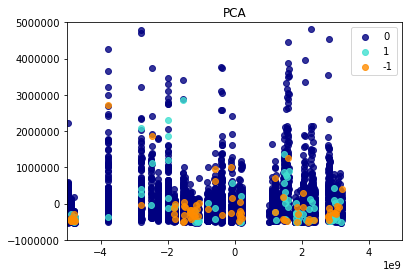

In [137]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


plt.figure()
colors = ['navy', 'turquoise','darkorange']
target_names = ['0', '1', '-1']

for color, i, target_name in zip(colors, [0,1,-1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlim([-0.5E10,0.5E10])
plt.ylim([-0.1E7,0.5E7])
plt.title('PCA')

In [125]:
len(X_r[y==-1])

100